In [1]:
import os
import random
import numpy as np
from tqdm import tqdm_notebook as tqdm
from numpy.random import randint as rint
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses

# mpl.use('agg')
%run queue_generator.ipynb
%run talking_people_generator.ipynb
%run passing_by_generator.ipynb
%run model_utils.ipynb
%run dataset_generator.ipynb
%run evaluate.ipynb
# mpl.use('module://matplotlib_inline.backend_inline')

2024-03-12 18:10:29.867900: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 18:10:30.860716: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/Social_Costmap_ws/dev_ws/install/pic4msgs/lib:/usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/foxy/opt/yaml_cpp_vendor/lib:/opt/ros/foxy/opt/rviz_ogre_vendor/lib:/opt/ros/foxy/lib/x86_64-linux-gnu:/opt/ros/foxy/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-03-12 18:10:30.860796: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic l

In [2]:
tot_area=24
res=0.2
people_range=(2,5)
p_per_group = (2,3)
area_dim=2.2
min_dist=0.8
group_range = (0,1)
iterations=int(5e5)

limit_area = []

In [3]:
# test_queue_module1(tot_area=tot_area, res=res, area_dim=(1.2,7), n_people=4, orientation="orizontal")
# test_queue_module2()

In [4]:
# test_talking_module1(tot_area=tot_area, res=res, n_people=4, area_dim=area_dim, min_dist=min_dist, limit_area=[])
# test_talking_module2(tot_area, res, p_per_group, area_dim, min_dist, limit_area, group_range)

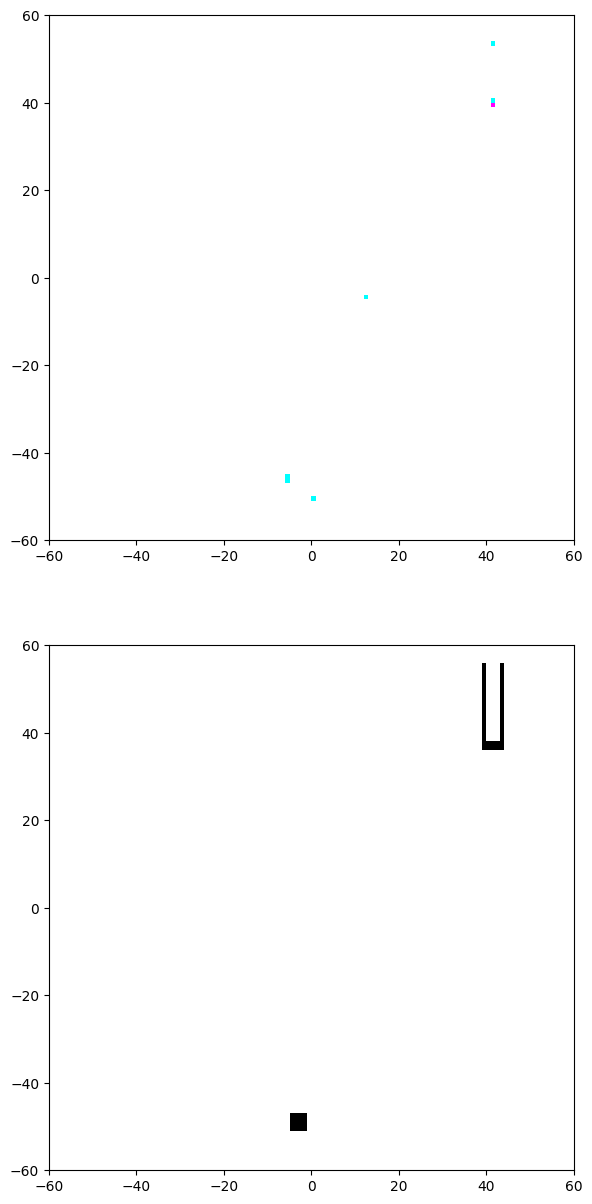

In [5]:
data = gather_single_data(tot_area, res, people_range, p_per_group, area_dim, min_dist, group_range)
plot_scenario(tot_area, res, data)

### Training

In [6]:
dataset = get_autogenerator_dataset(
    tot_area, 
    res, 
    people_range, 
    p_per_group, 
    area_dim, 
    min_dist, 
    group_range, 
    total_items=iterations
)

2024-03-12 18:10:37.485361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-12 18:10:37.528138: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-12 18:10:37.528456: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-12 18:10:37.530169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [7]:
model = create_enc_dec_small(tot_area, res)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 120, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 120, 120, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1

In [41]:
history = model.fit(
    dataset,
    epochs=5)

Epoch 1/5


2024-02-28 12:36:17.095737: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2024-02-28 12:36:19.169468: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fcd7c15db00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-28 12:36:19.169489: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Super, Compute Capability 7.5
2024-02-28 12:36:19.188217: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-28 12:36:19.397082: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


     17/Unknown - 6s 28ms/step - loss: 0.2198 - accuracy: 0.9826

KeyboardInterrupt: 

In [ ]:
# model.save('/root/models/SocialCostmap.keras')

### Evaluation

In [9]:
eval_model = tf.keras.models.load_model('Results/SocialCostmapModel.keras')
# eval_model1 = tf.keras.models.load_model('/root/models/SocialCostmap1.keras')
# eval_model2 = tf.keras.models.load_model('/root/models/SocialCostmap2.keras')

2024-03-12 18:11:07.521170: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101


1/1 [==============================] - 2s 2s/step


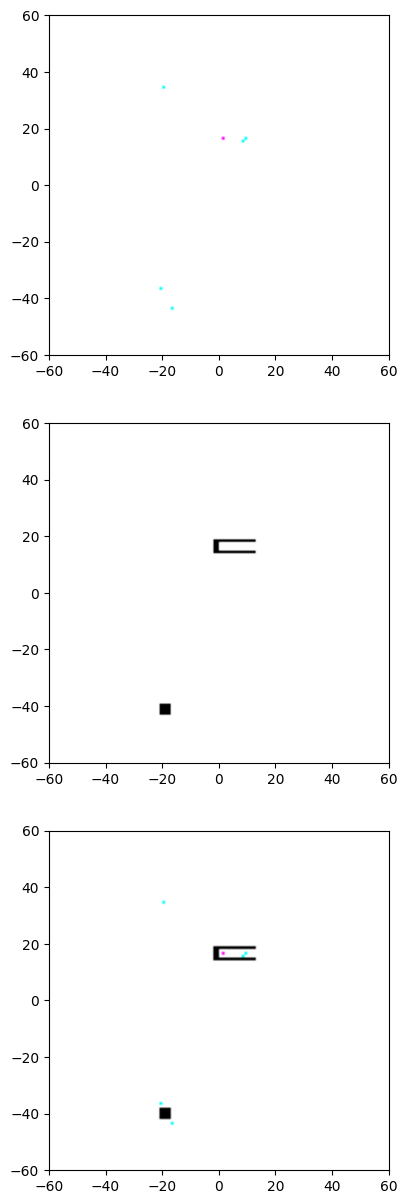

In [10]:
data = gather_single_data(tot_area, res, people_range=(2,15), p_per_group=(1,2), area_dim=area_dim, min_dist=min_dist, group_range=(0,1))

evaluate_model(tot_area, res, data, eval_model)
# compare_models(tot_area, res, data, [eval_model, eval_model1, eval_model2])